In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
attributes = [{'color':'#E063FF', 'linestyle':'solid'}, {'color':'#C08AD6', 'linestyle':'solid'}, {'color':'#A0B1AD', 'linestyle':'solid'}, {'color':'#80D883', 'linestyle':'solid'}, {'color':'#60FF5A', 'linestyle':'solid'}, {'color':'#000000', 'linestyle':'solid'}]
colors = plt.cm.plasma(np.linspace(0, 1, 4))
colors2 = plt.cm.plasma(np.linspace(0, 1, 4))
colors = np.append(colors, [[0., 0., 0., 1.]], axis=0)
for alpha in colors2:
    alpha[3] = 0.25
colors2

array([[0.050383, 0.029803, 0.527975, 0.25    ],
       [0.610667, 0.090204, 0.619951, 0.25    ],
       [0.928329, 0.472975, 0.326067, 0.25    ],
       [0.940015, 0.975158, 0.131326, 0.25    ]])

In [3]:
def get_frames(path, index=2, rows=100, skiprows=0):
    dfs = []
    filenames = glob.glob(path)
    print(len(filenames))
    for filename in filenames:
        dfs.append((pd.read_csv(filename, sep=",", header=None, nrows=rows, skiprows=skiprows))[index].tolist())
    return dfs

In [4]:
def get_log_frames(path):
    dfs = []
    filenames = glob.glob(path)
    print(len(filenames))
    for filename in filenames:
        dfs.append(np.array((pd.read_csv(filename, header=None, nrows=100))[0].tolist())* 100)
    return dfs

In [5]:
def swap_order(dfs, ids):
    new_dfs = [None] * len(ids)
    for i, id in enumerate(ids):
        new_dfs[id] = (dfs[i])
    return new_dfs

In [6]:
def plot(dfs, title, baseline, box=False, save=False):
    y = np.arange(200)
    for i, df in enumerate(dfs):
        plt.plot(y, df[3].tolist(), label=names[i], color=colors[i], linestyle=attributes[i]['linestyle'])
    plt.plot(y, baseline[3].tolist(), label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
    plt.xlabel('Communication Round')
    plt.ylabel('Accuracy')
    plt.title(title)
    if box:
        plt.legend(loc='lower right', prop={'size': 9})
    if save:
        plt.savefig(f'{title}.png', dpi=300, format='png')
    plt.show()

In [7]:
def get_min_list(l):
    new = []
    for i in range(0, 100):
        new.append(min(l[0][i], l[1][i], l[2][i]))
    return new

In [8]:
def get_max_list(l):
    new = []
    for i in range(0, 100):
        new.append(max(l[0][i], l[1][i], l[2][i]))
    return new

## KIRUNDI

In [ ]:
names = ['FL-Polyglot Model (Fine-Tuned)', 'Standard Training']

### Fine-Tuning OPTUNA

In [9]:
folders = ['FL', 'NOFL']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/50_round_train/kir-optuna/full_shot/{folder}/*", index=4))
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Kirundi (Fine-Tuned) Full Data Learning'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
title = title.replace(' ', '_')
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

3
3


0
1


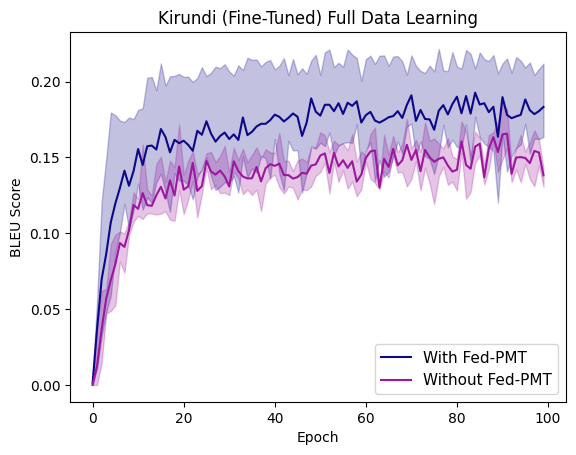

In [10]:
folders = ['FL', 'NOFL']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/50_round_train/kir-optuna/100_shot/{folder}/*", index=4))
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Kirundi (Fine-Tuned) Full Data Learning'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
title = title.replace(' ', '_')
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

In [ ]:
folders = ['FL', 'NOFL']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/50_round_train/kir-optuna/500_shot/{folder}/*", index=4))
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Kirundi (Fine-Tuned) Full Data Learning'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
title = title.replace(' ', '_')
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

### Equal Weighting vs FT

In [ ]:
names = ['FL-Polyglot Model (Fine-Tuned)', 'FL-Polyglot Model (Equal-Weighting)']

In [ ]:
folders = ['FL', 'equal']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/50_round_train/kir-optuna/full_shot/{folder}/*", index=4))
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Kirundi (Fine-Tuned) Full Data Learning'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
title = title.replace(' ', '_')
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

### Swahili Parent vs Luganda Parent

In [ ]:
names = ['FL-Polyglot Model With Luganda', 'FL-Polyglot Model With Swahili']

In [ ]:
folders = ['FL', 'swa']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/50_round_train/kir-optuna/full_shot/{folder}/*", index=4))
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Kirundi (Fine-Tuned) Full Data Learning'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
title = title.replace(' ', '_')
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

### Frozen Weights vs FT

In [ ]:
names = ['FL-Polyglot Model (Fine-Tuned)', 'FL-Polyglot Model (Frozen Intermediate Weights)']

In [ ]:
folders = ['FL', 'Frozen']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/50_round_train/kir-optuna/full_shot/{folder}/*", index=4))
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Kirundi (Fine-Tuned) Full Data Learning'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
title = title.replace(' ', '_')
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

### Perfedavg vs FT

In [ ]:
names = ['FL-Polyglot Model (Fine-Tuned)', 'PerFedAvg']

In [ ]:
folders = ['FL', 'perfedavg']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/50_round_train/kir-optuna/full_shot/{folder}/*", index=4))
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Kirundi (Fine-Tuned) Full Data Learning'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
title = title.replace(' ', '_')
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

## Romance

In [27]:
folders = ['FL', 'NOFL']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/fra_ita_por_ron_spa/cat/10_shot/{folder}/*"))

3
3


0
1


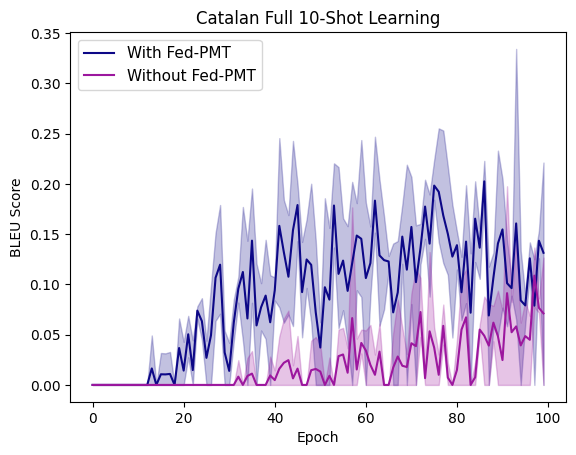

In [28]:
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Catalan Full 10-Shot Learning'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.png', dpi=300, format='png')
plt.show()

In [29]:
folders = ['FL', 'NOFL']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/fra_ita_por_ron_spa/fin/full_shot/{folder}/*"))

3
3


0
1


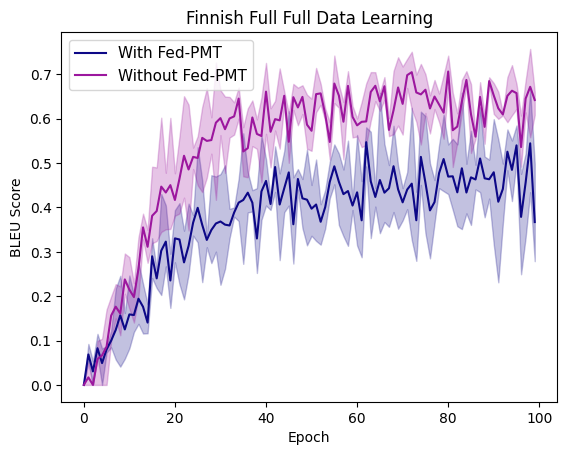

In [30]:
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Finnish Full Full Data Learning'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.png', dpi=300, format='png')
plt.show()

In [31]:
folders = ['FL', 'NOFL']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/fra_ita_por_ron_spa/fin/100_shot/{folder}/*"))

3
3


0
1


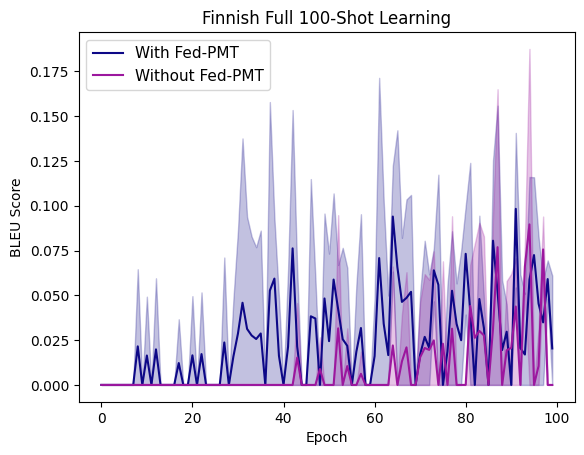

In [32]:
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Finnish Full 100-Shot Learning'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.png', dpi=300, format='png')
plt.show()

In [33]:
names = ['Romance Languages', 'Diverse Languages']

In [94]:
folders = ['romance', 'scatter']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/compare_romance_scatter/fin/100_shot/{folder}/*"))

3
3


0
1


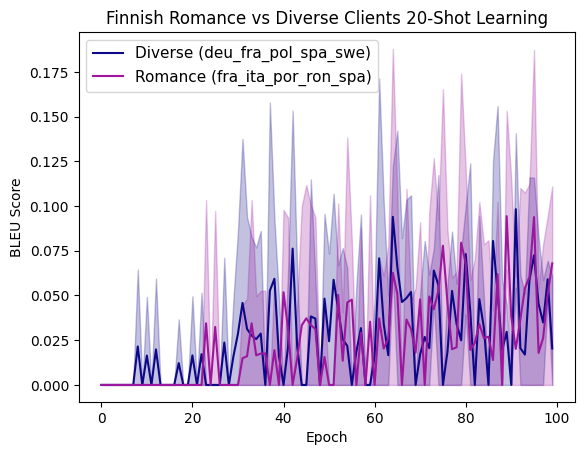

In [95]:
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Finnish Romance vs Diverse Clients 20-Shot Learning'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.png', dpi=300, format='png')
plt.show()

In [96]:
folders = ['romance', 'scatter']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/compare_romance_scatter/fin/full_shot/{folder}/*"))

3
3


0
1


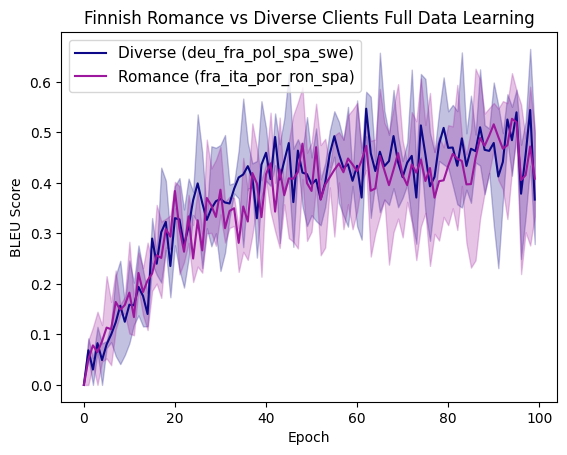

In [97]:
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Finnish Romance vs Diverse Clients Full Data Learning'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.png', dpi=300, format='png')
plt.show()

In [99]:
names = ['Diverse (deu_fra_pol_spa_swe)', 'Romance (fra_ita_por_ron_spa)']
folders = ['deu', 'fra']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/compare_globals/{folder}/*"))

1
1


0
1


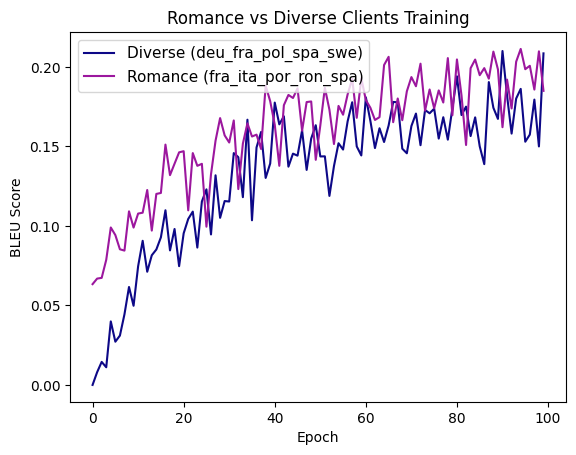

In [100]:
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Romance vs Diverse Clients Training'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.png', dpi=300, format='png')
plt.show()

In [42]:
names = ['Nospa', 'Spa']
folders = ['nospa', 'spa']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/exclude_spanish/globals/{folder}/*"))

1
1


0
1


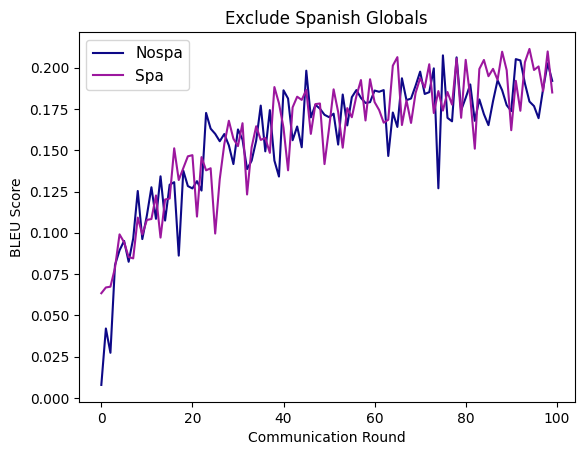

In [43]:
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Exclude Spanish Globals'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.png', dpi=300, format='png')
plt.show()

In [45]:
names = ['Nospa', 'Spa']
folders = ['nospa', 'spa']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/exclude_spanish/personalization/full_shot/{folder}/*"))

3
3


0
1


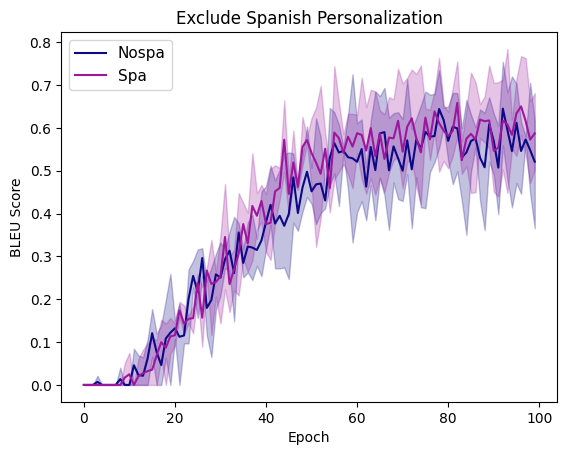

In [46]:
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Exclude Spanish Personalization'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.png', dpi=300, format='png')
plt.show()

In [48]:
names = ['Nospa', 'Spa']
folders = ['nospa', 'spa']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/exclude_spanish/personalization/10_shot/{folder}/*"))

3
3


0
1


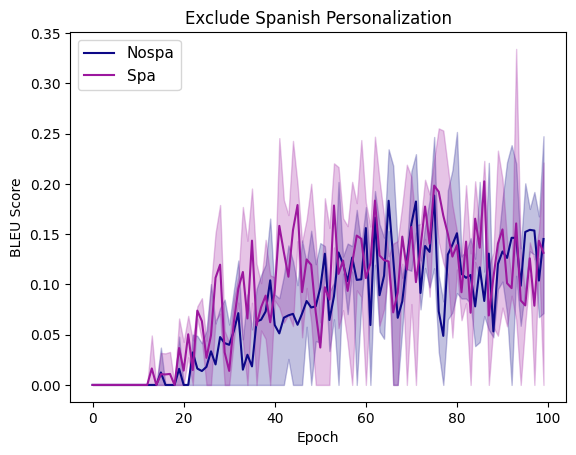

In [49]:
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Exclude Spanish Personalization 10-shot'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.png', dpi=300, format='png')
plt.show()

3
3
0
1


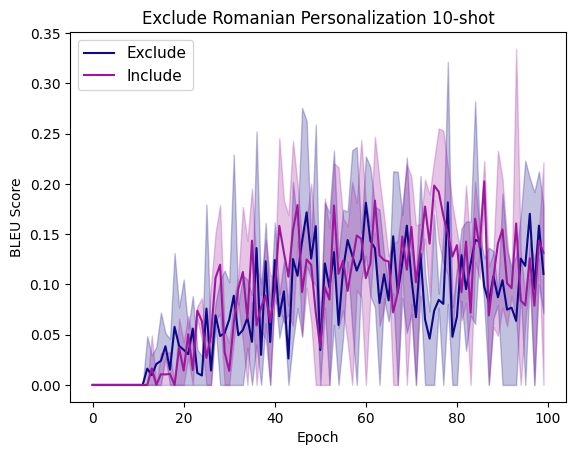

In [50]:
names = ['Exclude', 'Include']
folders = ['exclude', 'include']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/exclude_romanian/personalization/10_shot/{folder}/*"))

y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Exclude Romanian Personalization 10-shot'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.png', dpi=300, format='png')
plt.show()

3
3
0
1


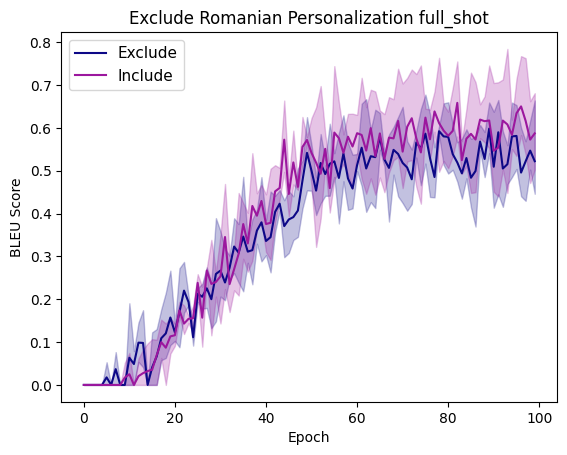

In [51]:
names = ['Exclude', 'Include']
folders = ['exclude', 'include']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/exclude_romanian/personalization/full_shot/{folder}/*"))

y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Epoch')
plt.ylabel('BLEU Score')
title = 'Exclude Romanian Personalization full_shot'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.png', dpi=300, format='png')
plt.show()

1
1
0
1


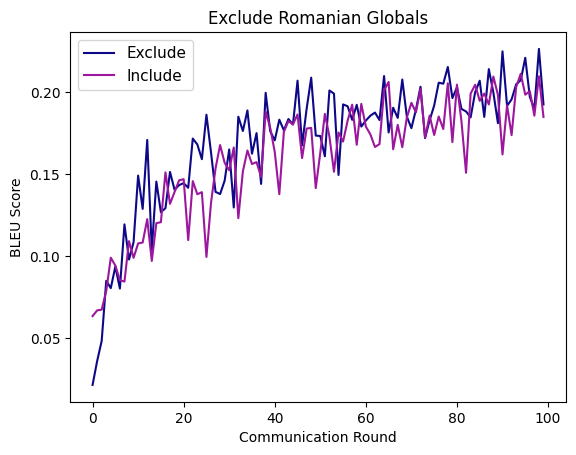

In [54]:
names = ['Exclude', 'Include']
folders = ['exclude', 'include']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/exclude_romanian/globals/{folder}/*"))

y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums / 3, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Exclude Romanian Globals'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.png', dpi=300, format='png')
plt.show()

## BANTU

#### 3 Strategies

1
1
1
0
1
2


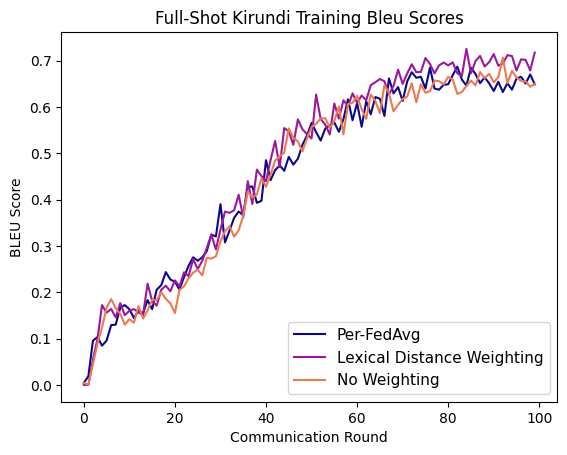

In [73]:
names = ['Per-FedAvg', 'Lexical Distance Weighting', 'No Weighting']
folders = ['data_size', 'lexical', 'no_weight']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_strategies/full_shot/{folder}/*"))
    
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Full-Shot Kirundi Training Bleu Scores'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
1
0
1
2


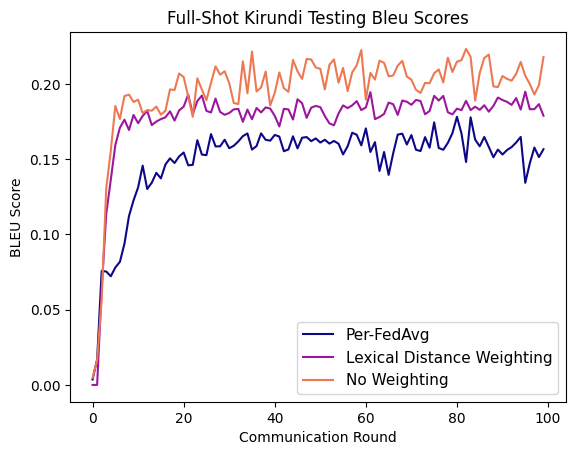

In [74]:
names = ['Per-FedAvg', 'Lexical Distance Weighting', 'No Weighting']
folders = ['data_size', 'lexical', 'no_weight']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_strategies/full_shot/{folder}/*", index=4))
    
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Full-Shot Kirundi Testing Bleu Scores'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
1
0
1
2


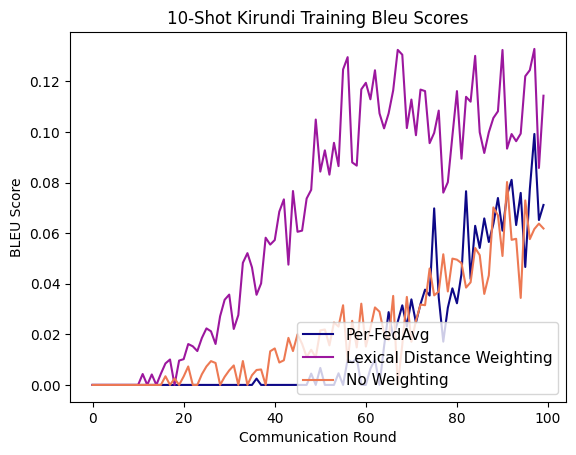

In [75]:
names = ['Per-FedAvg', 'Lexical Distance Weighting', 'No Weighting']
folders = ['data_size', 'lexical', 'no_weight']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_strategies/10_shot/{folder}/*"))
    
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = '10-Shot Kirundi Training Bleu Scores'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
1
0
1
2


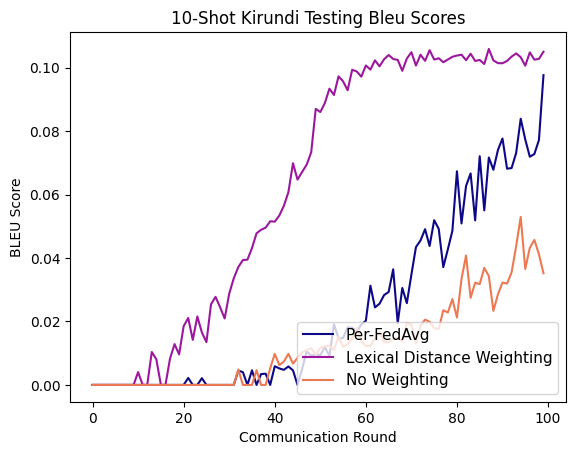

In [76]:
names = ['Per-FedAvg', 'Lexical Distance Weighting', 'No Weighting']
folders = ['data_size', 'lexical', 'no_weight']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_strategies/10_shot/{folder}/*", index=4))
    
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = '10-Shot Kirundi Testing Bleu Scores'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
1
0
1
2


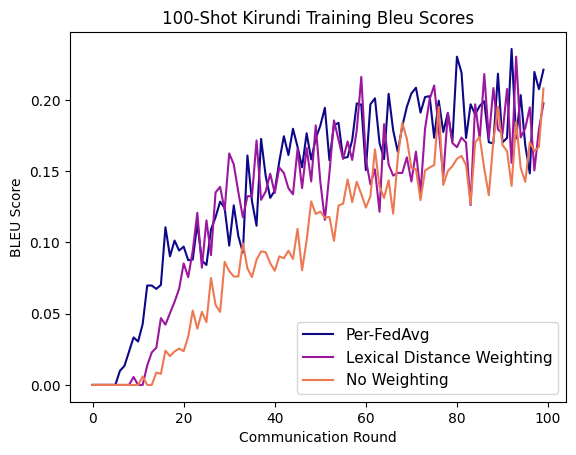

In [77]:
names = ['Per-FedAvg', 'Lexical Distance Weighting', 'No Weighting']
folders = ['data_size', 'lexical', 'no_weight']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_strategies/100_shot/{folder}/*", index=2))
    
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = '100-Shot Kirundi Training Bleu Scores'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
1
0
1
2


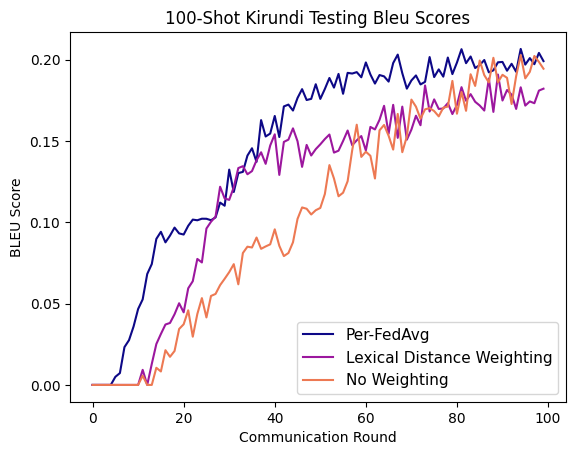

In [94]:
names = ['Per-FedAvg', 'Lexical Distance Weighting', 'No Weighting']
folders = ['data_size', 'lexical', 'no_weight']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_strategies/100_shot/{folder}/*", index=4))
    
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = '100-Shot Kirundi Testing Bleu Scores'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
1
0
1
2


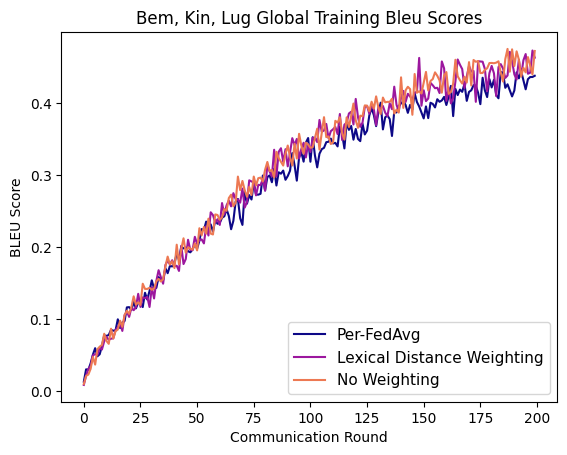

In [88]:
names = ['Per-FedAvg', 'Lexical Distance Weighting', 'No Weighting']
folders = ['data_size', 'lexical', 'no_weight']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_strategies/globals/{folder}/*", index=2, rows=200, skiprows=2))
    
y = np.arange(200)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(200)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Bem, Kin, Lug Global Training Bleu Scores'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
1
0
1
2


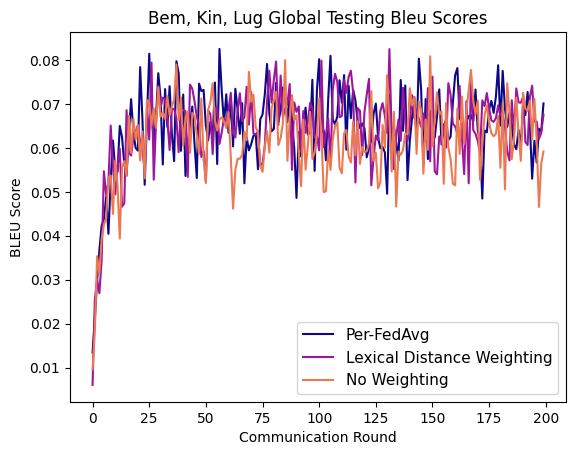

In [93]:
names = ['Per-FedAvg', 'Lexical Distance Weighting', 'No Weighting']
folders = ['data_size', 'lexical', 'no_weight']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_strategies/globals/{folder}/*", index=4, rows=200, skiprows=2))
    
y = np.arange(200)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(200)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Bem, Kin, Lug Global Testing Bleu Scores'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

#### Exclusion

1
1
0
1


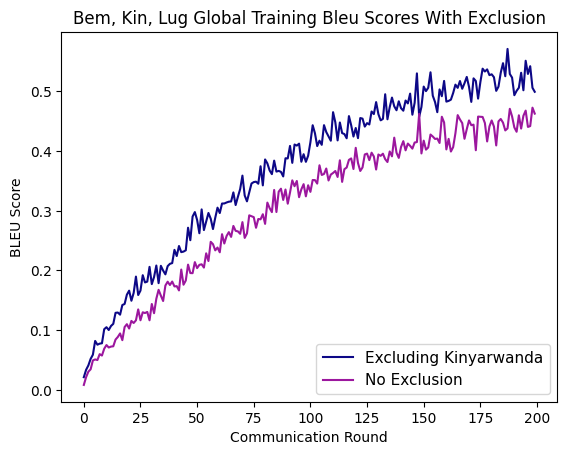

In [80]:
names = ['Excluding Kinyarwanda', 'No Exclusion']
folders = ['exclude', 'no_exclude']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_excludeKIN/globals/{folder}/*", index=2, rows=200, skiprows=2))
    
y = np.arange(200)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(200)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Bem, Kin, Lug Global Training Bleu Scores With Exclusion'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
0
1


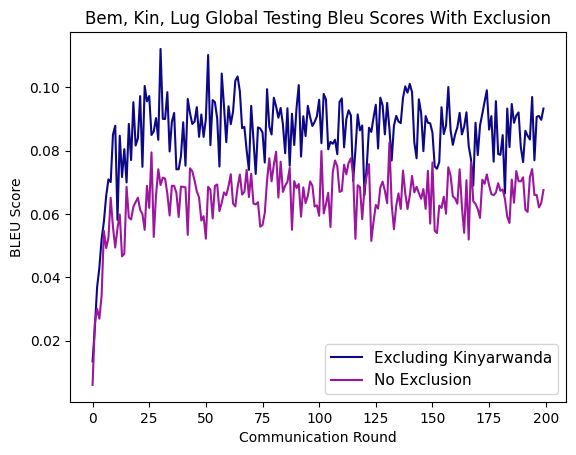

In [81]:
names = ['Excluding Kinyarwanda', 'No Exclusion']
folders = ['exclude', 'no_exclude']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_excludeKIN/globals/{folder}/*", index=4, rows=200, skiprows=2))
    
y = np.arange(200)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(200)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Bem, Kin, Lug Global Testing Bleu Scores With Exclusion'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
0
1


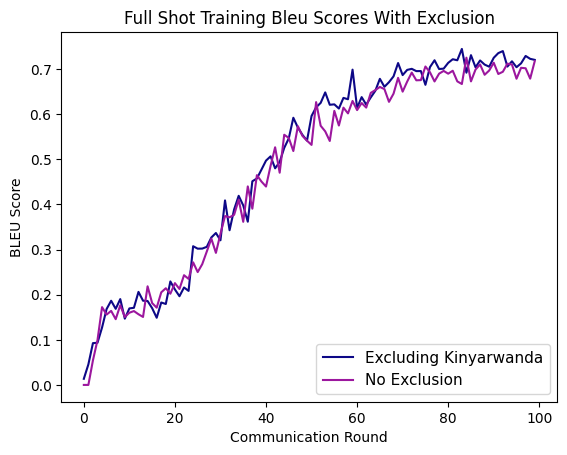

In [82]:
names = ['Excluding Kinyarwanda', 'No Exclusion']
folders = ['exclude', 'no_exclude']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_excludeKIN/full_shot/{folder}/*", index=2))
    
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Full Shot Training Bleu Scores With Exclusion'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
0
1


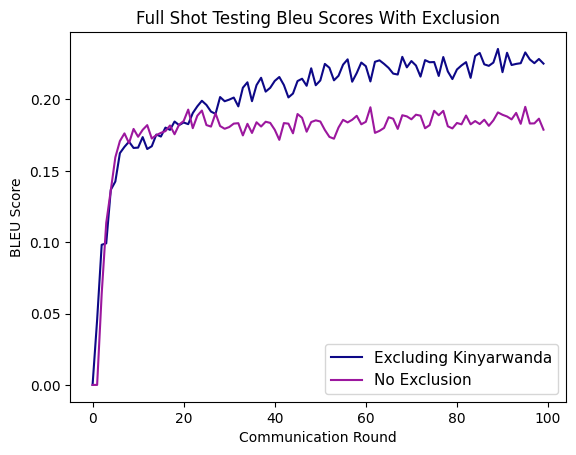

In [83]:
names = ['Excluding Kinyarwanda', 'No Exclusion']
folders = ['exclude', 'no_exclude']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_excludeKIN/full_shot/{folder}/*", index=4))
    
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Full Shot Testing Bleu Scores With Exclusion'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
0
1


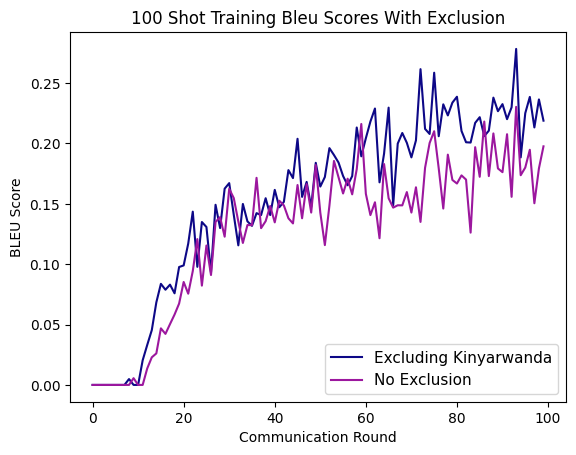

In [84]:
names = ['Excluding Kinyarwanda', 'No Exclusion']
folders = ['exclude', 'no_exclude']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_excludeKIN/100_shot/{folder}/*", index=2))
    
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = '100 Shot Training Bleu Scores With Exclusion'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
0
1


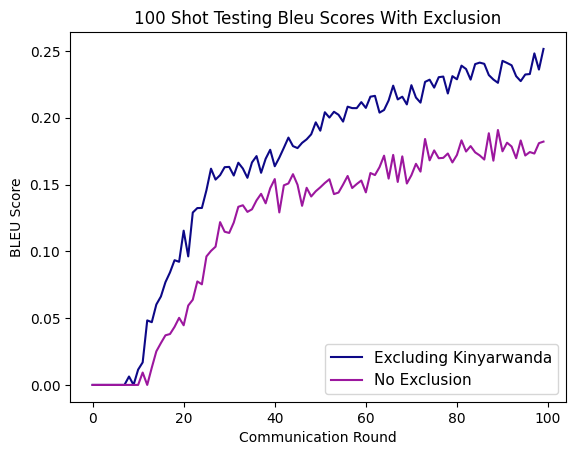

In [85]:
names = ['Excluding Kinyarwanda', 'No Exclusion']
folders = ['exclude', 'no_exclude']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_excludeKIN/100_shot/{folder}/*", index=4))
    
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = '100 Shot Testing Bleu Scores With Exclusion'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
0
1


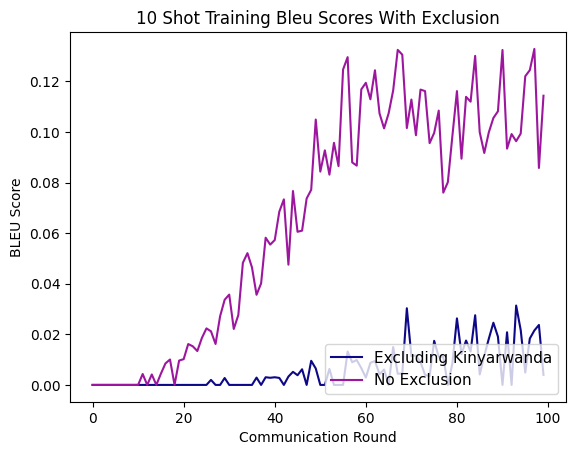

In [86]:
names = ['Excluding Kinyarwanda', 'No Exclusion']
folders = ['exclude', 'no_exclude']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_excludeKIN/10_shot/{folder}/*", index=2))
    
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = '10 Shot Training Bleu Scores With Exclusion'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
0
1


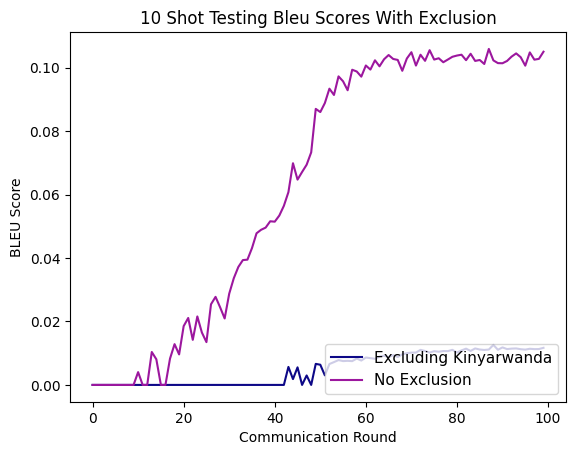

In [87]:
names = ['Excluding Kinyarwanda', 'No Exclusion']
folders = ['exclude', 'no_exclude']
dfs_raw = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_excludeKIN/10_shot/{folder}/*", index=4))
    
y = np.arange(100)
dfs = dfs_raw
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = '10 Shot Testing Bleu Scores With Exclusion'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

#### Baselines

1
1
0
1


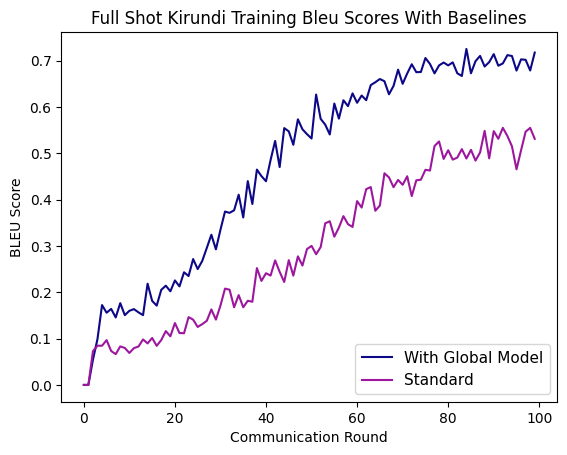

In [89]:
names = ['With Global Model', 'Standard']
folders = ['kir']
dfs_raw = []
dfs_raw2 = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_baselines/full_shot/FL/{folder}/*", index=2))
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_baselines/full_shot/NOFL/{folder}/*", index=2))
    
y = np.arange(100)
dfs = dfs_raw
dfs2 = dfs_raw2
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
for i, df in enumerate(dfs2):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors2[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Full Shot Kirundi Training Bleu Scores With Baselines'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
0
1


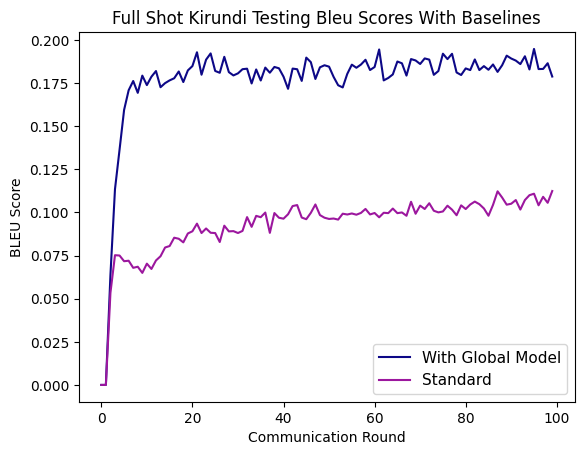

In [90]:
names = ['With Global Model', 'Standard']
folders = ['kir']
dfs_raw = []
dfs_raw2 = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_baselines/full_shot/FL/{folder}/*", index=4))
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_baselines/full_shot/NOFL/{folder}/*", index=4))
    
y = np.arange(100)
dfs = dfs_raw
dfs2 = dfs_raw2
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
for i, df in enumerate(dfs2):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors2[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = 'Full Shot Kirundi Testing Bleu Scores With Baselines'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
0
1


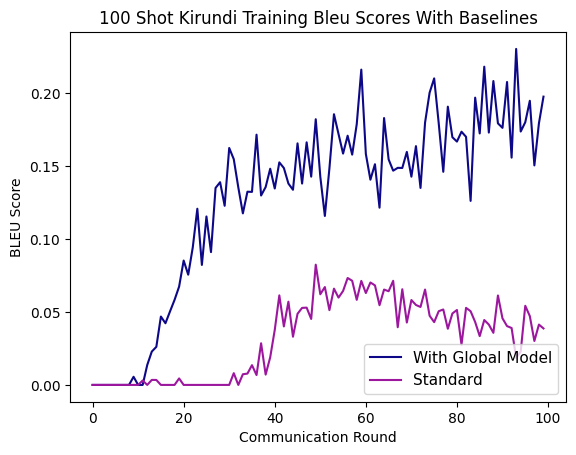

In [91]:
names = ['With Global Model', 'Standard']
folders = ['kir']
dfs_raw = []
dfs_raw2 = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_baselines/100_shot/FL/{folder}/*", index=2))
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_baselines/100_shot/NOFL/{folder}/*", index=2))
    
y = np.arange(100)
dfs = dfs_raw
dfs2 = dfs_raw2
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
for i, df in enumerate(dfs2):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors2[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = '100 Shot Kirundi Training Bleu Scores With Baselines'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

1
1
0
1


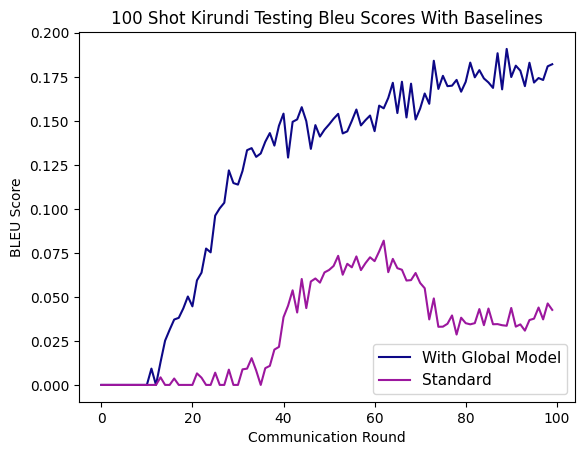

In [92]:
names = ['With Global Model', 'Standard']
folders = ['kir']
dfs_raw = []
dfs_raw2 = []
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_baselines/100_shot/FL/{folder}/*", index=4))
for folder in folders:
    dfs_raw.append(get_frames(f"./results/BANTU_compare_baselines/100_shot/NOFL/{folder}/*", index=4))
    
y = np.arange(100)
dfs = dfs_raw
dfs2 = dfs_raw2
for i, df in enumerate(dfs):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
for i, df in enumerate(dfs2):
    print(i)
    sums = np.zeros(100)
    for d in df:
        sums += d
    plt.plot(y, sums, label=names[i], color=colors2[i], linestyle='solid')
    # plt.fill_between(y, get_min_list(df), get_max_list(df), color=colors2[i])
# plt.plot(y, baseline, label=names[3], color=colors[3], linestyle=attributes[5]['linestyle'])
plt.xlabel('Communication Round')
plt.ylabel('BLEU Score')
title = '100 Shot Kirundi Testing Bleu Scores With Baselines'
plt.title(title)
plt.legend(loc='lower right', prop={'size': 11})
plt.savefig(f'{title}.pdf', dpi=300, format='pdf')
plt.show()

In [45]:
def get_pair_index(dataloader):
    shuffled_indices = []
    for _, _, indices in dataloader:
        shuffled_indices.extend(indices.tolist())
    return shuffled_indices